<a href="https://colab.research.google.com/github/Me-RockingAbhi/My-Projects/blob/master/pridictin_song_name.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount("/content/gdive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdive


In [0]:
import numpy as np
import pandas as pd
data_tr=pd.read_csv("/content/gdive/My Drive/likes_Data_Train.csv")
data_te=pd.read_csv("/content/gdive/My Drive/likes_Data_Test.csv")
data_tr.head()

,Unique_ID,Name,Genre,Country,Song_Name,Timestamp,Views,Comments,Likes,Popularity,Followers
0,413890,Hardstyle,danceedm,AU,N-Vitral presents BOMBSQUAD - Poison Spitter (...,2018-03-30 15:24:45.000000,14017,4,499,97,119563
1,249453,Dj Aladdin,danceedm,AU,Dj Aladdin - Old School Hip Hop Quick Mix,2016-06-20 05:58:52.000000,1918,17,49,17,2141
2,681116,Maxximize On Air,danceedm,AU,Maxximize On Air - Mixed by Blasterjaxx - Epis...,2015-05-08 17:45:59.000000,9668,11,312,91,22248
3,387253,GR6 EXPLODE,rbsoul,AU,MC Yago - Tenho Compromisso (DJ R7),2017-06-08 23:50:03.000000,113036,2,"2,400",76,393655
4,1428029,Tritonal,danceedm,AU,Escape (feat. Steph Jones),2016-09-17 20:50:19.000000,110024,81,"3,031",699,201030


In [0]:
data_te.head()
data_tr=data_tr.drop("Views",axis=1)

In [0]:
data_tr.isnull().sum()
print(data_tr.shape)
print(data_te.shape)

(78458, 10)
(19615, 10)


In [0]:
data_tr.dtypes
data=data_tr.append(data_te)
data=data.drop("Unique_ID",axis=1)
data=data.drop("Song_Name",axis=1)

In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Genre']=le.fit_transform(data['Genre'])
le=LabelEncoder()
data['Country']=le.fit_transform(data['Country'])
le=LabelEncoder()
data['Name']=le.fit_transform(data['Name'])

In [0]:
year=[]
for i in data['Timestamp']:
  name=str(i.split("-")[0])
  year.append(int(name))
data['year']=year
print(data['year'].shape)

(98073,)


In [0]:
c=0
time=[];
for i in data['Timestamp']:
  name=str(i.split(" ")[-1])
  name1=name.split(":",3)
  time.append(float(name1[0]+name1[1])/100)
print(time)
data['time']=time

[15.24, 5.58, 17.45, 23.5, 20.5, 14.55, 17.23, 0.0, 22.37, 4.07, 10.29, 22.42, 21.55, 20.23, 17.02, 19.54, 17.35, 20.44, 23.28, 2.14, 9.2, 13.29, 18.54, 13.25, 23.04, 17.02, 21.46, 0.0, 6.14, 17.58, 8.56, 15.54, 0.0, 3.27, 17.2, 18.49, 17.58, 10.35, 4.0, 18.57, 0.0, 9.12, 14.28, 19.3, 17.24, 20.11, 19.42, 17.04, 20.08, 0.0, 15.08, 5.0, 19.47, 12.51, 16.41, 22.59, 14.01, 11.15, 14.03, 12.5, 14.12, 18.52, 10.49, 18.53, 10.31, 23.59, 13.55, 3.04, 17.25, 13.59, 16.24, 18.59, 9.53, 0.0, 10.27, 17.47, 23.0, 11.33, 0.27, 1.42, 15.52, 23.43, 19.5, 14.2, 8.45, 16.03, 1.32, 19.59, 12.0, 19.05, 17.02, 17.51, 15.05, 15.24, 0.0, 23.54, 20.1, 15.23, 13.27, 3.5, 0.0, 10.0, 0.11, 22.19, 0.0, 5.44, 19.21, 3.31, 16.24, 19.23, 8.0, 19.0, 15.2, 21.43, 2.14, 13.3, 4.53, 18.49, 23.32, 0.0, 21.0, 11.47, 5.0, 0.0, 16.0, 15.53, 17.36, 8.09, 11.44, 17.37, 22.38, 23.45, 3.46, 16.04, 1.41, 0.0, 17.4, 0.0, 23.34, 0.0, 0.0, 17.53, 9.41, 19.04, 0.0, 5.08, 10.12, 5.47, 2.24, 17.24, 0.0, 5.4, 13.49, 15.53, 19.12, 4.47

In [0]:
data['Name'].nunique()
data=data.drop("Timestamp",axis=1)

In [0]:
data.dtypes

Name            int64
Genre           int64
Country         int64
Comments        int64
Likes          object
Popularity     object
Followers       int64
year            int64
time          float64
dtype: object

In [0]:
likes=[]
c=0;
for i in data['Likes']:
  if "," in i:
    i=i.replace(',','')
  likes.append(str(i))
likes2=[]
for i in likes:
  if 'K' in i:
    name=str(i).split("K")[0]
    name=float(name)*1000;
    likes2.append(name)
  elif 'M' in i :
    name=str(i).split("M")[0]
    name=float(name)*1000000;
    likes2.append(name)
  else:
    likes2.append(float(i))
data['Likes']=likes2

print(data['Likes'].dtypes)

float64


In [0]:
pop=[]
c=0;
for i in data['Popularity']:
  if "," in i:
    i=i.replace(',','')
  pop.append(str(i))
pop2=[]
for i in pop:
  if 'K' in i:
    name=str(i).split("K")[0]
    name=float(name)*1000;
    print(name)
    pop2.append(name)
  elif 'M' in i :
    name=str(i).split("M")[0]
    name=float(name)*1000000;
    print(name)
    pop2.append(name)
  else:
    pop2.append(float(i))
data['Popularity']=pop2
print(data['Popularity'].dtypes)

13100.0
14900.0
21800.0
24300.0
18900.0
15200.0
10100.0
15000.0
30900.0
19800.0
11800.0
22500.0
35600.0
37700.0
13300.0
15300.0
15200.0
19800.0
24300.0
10000.0
13300.0
58200.0
36500.0
64900.00000000001
11700.0
75600.0
11700.0
40300.0
10800.0
13400.0
22300.0
17100.0
25700.0
19100.0
12000.0
12400.0
39100.0
11100.0
49000.0
13400.0
19200.0
10100.0
44700.0
36500.0
35700.0
14700.0
15500.0
140000.0
13600.0
10300.0
13700.0
14200.0
16400.0
18800.0
19300.0
12600.0
32400.0
14000.0
26300.0
15900.0
16100.000000000002
34300.0
28600.0
10500.0
61000.0
18100.0
11200.0
89200.0
23800.0
16700.0
10500.0
16500.0
10000.0
31700.0
80000.0
11800.0
130000.0
17700.0
25200.0
14100.0
12100.0
32100.0
11000.0
16400.0
13200.0
29400.0
14100.0
12600.0
10300.0
10700.0
31100.0
15600.0
49500.0
21500.0
15800.0
19100.0
18100.0
12500.0
22000.0
17700.0
34900.0
14000.0
48300.0
13500.0
16800.0
50200.0
10100.0
41400.0
13200.0
50400.0
38700.0
11200.0
13300.0
11200.0
23900.0
12400.0
36100.0
12300.0
13800.0
59900.0
20500.0
15100.0
1

In [0]:
data['Followers']=data['Followers'].div(10000)
data['year']=data['year'].div(100)
data['Likes']=data['Likes'].div(10000)
data['Comments']=data['Comments'].div(100)
data['Popularity']=data['Popularity'].div(10000)
data.head()

,Name,Genre,Country,Comments,Likes,Popularity,Followers,year,time
0,403,5,0,0.04,0.0499,0.0097,11.9563,20.18,15.24
1,268,5,0,0.17,0.0049,0.0017,0.2141,20.16,5.58
2,637,5,0,0.11,0.0312,0.0091,2.2248,20.15,17.45
3,366,17,0,0.02,0.2400,0.0076,39.3655,20.17,23.50
4,979,5,0,0.81,0.3031,0.0699,20.1030,20.16,20.50


In [0]:
data['Name']=data['Name'].div(100)

In [0]:
import matplotlib.pyplot as plt
data2=pd.read_csv("/content/gdive/My Drive/likes_Data_Train.csv")
data2.groupby('Name').mean()['Views'].sort_values().plot(kind='bar',figsize=(10,4))
plt.title("Distribution of Views, Name-wise")

In [0]:

tmp = pd.pivot_table(data,values='Comments',index='Genre',columns=['year'], aggfunc=np.mean, fill_value=0)
tmp.head()

year,19.73,19.79,19.82,19.86,19.90,19.91,19.92,19.94,19.95,19.96,19.97,19.99,20.00,20.01,20.02,20.03,20.04,20.05,20.06,20.07,20.08,20.09,20.10,20.11,20.12,20.13,20.14,20.15,20.16,20.17,20.18,20.19
Genre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.015,0.0,0,0.0,0.0,0.0,0.009,0,0.0,0,0.004706,0.0,0.005,0.004286,0.0,0.014951,0.0225,0.007727,0.032368,0.141739,0.046146,0.093197,1.105336,1.107275,3.141311,2.989618,2.934733,3.400642,3.110903,3.637405,3.294222
1,0.0,0.000,0.0,0,0.0,0.0,0.0,0.000,0,0.0,0,0.000000,0.0,0.000,0.000000,0.0,0.000000,5.2340,0.000000,0.000000,0.056857,0.000000,0.000000,4.953000,0.000000,11.170000,0.012500,6.766923,2.358571,0.041389,0.471750,0.188571
2,0.0,0.000,0.0,0,0.0,0.0,0.0,0.000,0,0.0,0,0.000000,0.0,0.000,0.000000,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.413529,13.179333,1.174404,0.304976,0.510979,0.363032,0.232632
3,0.0,0.000,0.0,0,0.0,0.0,0.0,0.000,0,0.0,0,0.000000,0.0,0.000,0.000000,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.580000,0.000000,1.741111,1.008135,0.904071,1.142928,0.520000,0.245532,0.000000
4,0.0,0.000,0.0,0,0.0,0.0,0.0,0.000,0,0.0,0,0.000000,0.0,0.000,0.000000,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,5.970000,7.717500,4.836190,8.030625,2.745455,1.008140,0.632586,0.050886,0.191946,0.095455


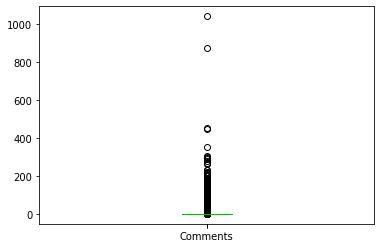

In [0]:
data['Likes'].plot(kind='box')
data['Comments'].plot(kind='box')

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,25))
i=1
for col in tmp.columns:
    plt.subplot(7,3,i)
    tmp[col].plot()
    plt.title(col,fontsize=14)
    plt.xlabel("")
    i+=1

In [0]:
df=data
# Log
df['Log_likes'] = np.log(df['Likes'])
df['Log_Comments'] = np.log(df['Comments'])
df['Log_Followers'] = np.log(df['Followers'])
df['Log_Popularity'] = np.log(df['Popularity'])

# SQRT
df['Sqrt_likes'] = np.sqrt(df['Likes'])
df['Sqrt_Comments'] = np.sqrt(df['Comments'])
df['Sqrt_Followers'] = np.sqrt(df['Followers'])
df['Sqrt_Popularity'] = np.sqrt(df['Popularity'])

# Standarize
df['Std_likes'] = (df['Likes']  - df['Likes'].mean())/df['Likes'].std()
df['Std_Comments'] = (df['Comments']-df['Comments'].mean())/df['Comments'].std()
df['Std_Followers'] = (df['Followers'] -df['Followers'].mean() )/df['Followers'].std()
df['Std_Popularity'] = (df['Popularity'] -df['Popularity'].mean() )/df['Popularity'].std()
alldata=df
alldata['Likes_Followers'] = np.divide(alldata['Likes'], alldata['Followers'])
alldata['Likes_Popularity'] = np.divide(alldata['Likes'], alldata['Popularity'])
alldata['Likes_Comments'] = np.divide(alldata['Likes'], alldata['Comments'])

# Followers
alldata['Followers_Popularity'] = np.divide(alldata['Followers'], alldata['Popularity'])
alldata['Followers_Comments'] = np.divide(alldata['Followers'], alldata['Comments'])
alldata['Followers_Likes'] = np.divide(alldata['Followers'], alldata['Likes'])

# Popularity
alldata['Popularity_Followers'] = np.divide(alldata['Popularity'], alldata['Followers'])
alldata['Popularity_Comments'] = np.divide(alldata['Popularity'], alldata['Comments'])
alldata['Popularity_Likes'] = np.divide(alldata['Popularity'], alldata['Likes'])

alldata['Total_Metrics'] = alldata['Likes'] + alldata['Popularity'] + alldata['Followers'] + alldata['Comments']

In [0]:
xtrain=data[:78458]
xtest=data[78458:]
data2=pd.read_csv("/content/gdive/My Drive/likes_Data_Train.csv")
ytrain=data2['Views']
ytrain=ytrain.values
data2['Views'].dtypes


dtype('int64')

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xtrain,ytrain,test_size=0.3)
import xgboost as xgb
model1= xgb.XGBRegressor(learning_rate=0.1,
                        n_estimators=10,
                        max_depth=8,
                        colsample_bytree=0.8,
                        subsample=0.7,
                        booster='gbtree',
                        objective='reg:squarederror',
                        )
model1.fit(x_train,y_train, eval_set=[(x_test,y_test)])
important_featues = pd.DataFrame(model1.get_booster().get_score().items(), columns=['feature','importance']).sort_values('importance', ascending=False)
print(important_featues['feature'][:10].values) #top 30 features
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(model1,max_num_features=10,ax=ax)

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score 
gbrt=GradientBoostingRegressor(n_estimators=321,max_depth=4)
from sklearn.ensemble import BaggingRegressor
regr = BaggingRegressor(base_estimator=gbrt,n_estimators=15, random_state=0).fit(xtrain, ytrain)
print(cross_val_score(regr,xtrain,ytrain,cv=4).mean())

0.9712641358483807


In [0]:
ans=regr.predict(xtest)
sample=pd.read_excel("/content/gdive/My Drive/likes_Sample_Submission.xlsx")
data=pd.DataFrame()
data['Unique_ID']=sample['Unique_ID']
data['Views']=ans
data.to_excel("ans_hack5.xlsx",index=False)